# Project Navigation Guidelines

In [1]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Label Coords (Label Model)

>> Experiment 8 (Exp8) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [2]:
exp = 7
trial = 1
'''
Trial 1 : 
Algorithms use Vote mechanic.
Sampling done within time period of 5s.
'''
None

# Core Libraries

In [3]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exploratory Data Analysis

# Prepare/Load Relevant Dataset

In [4]:
# Read csv file into dataframe.
csvfile = pd.read_csv('E7_All_Raw_200320v1.csv')
relDf = pd.DataFrame(csvfile)
# print(relDf)
relDf.columns = relDf.columns.str.strip() #strip unintended whitespaces

# print("Columns: ", relDf.columns)
# relDf = relDf[['Date','Time', 'ID2', 'RSSI', 'Location']] #select relevant columns
print(relDf)

# # Convert timestamp to date, time
# dateSeries = []
# timeSeries = []
# for ts in relDf['timestamp']:
#     dateData, timeData = str(ts).split("T")
#     timeData = timeData[:timeData.find("+")]
#     dateSeries.append(dateData)
#     timeSeries.append(timeData)
# #     print("Date: ", dateData)
# #     print("Time: ", timeData)

# relDf.insert(0, "Date", dateSeries)
# relDf.insert(1, "Time", timeSeries)
relDf = relDf.drop(columns = ["timestamp", "13", "14"])

relDf

                     timestamp   1   2   3   4   5   6   7   8    9  10  11  \
0    2020-03-20T16:12:31+08:00 -61 -95   0   0 -89   0 -98   0    0   0 -98   
1    2020-03-20T16:12:39+08:00 -64 -85   0   0 -92   0   0   0    0   0   0   
2    2020-03-20T16:12:47+08:00 -68 -83   0 -79 -88   0   0   0    0   0 -94   
3    2020-03-20T16:12:55+08:00 -60   0   0 -88 -92   0 -98   0 -101   0   0   
4    2020-03-20T16:13:04+08:00 -65   0 -83 -87 -92   0 -90   0  -99   0   0   
..                         ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..   
371  2020-03-20T18:06:18+08:00   0   0   0   0 -79   0   0   0    0 -95   0   
372  2020-03-20T18:06:26+08:00   0   0   0   0 -73   0   0   0    0 -95 -80   
373  2020-03-20T18:06:34+08:00   0   0   0 -81 -77   0 -78   0    0 -92   0   
374  2020-03-20T18:06:42+08:00   0   0   0 -81 -79   0   0   0    0   0   0   
375  2020-03-20T18:12:44+08:00 -86 -81 -97 -83 -74 -77 -80 -79  -85 -89 -80   

     12  13  14  label  
0     0   0   0      1  
1

,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-61,-95,0,0,-89,0,-98,0,0,0,-98,0,1
1,-64,-85,0,0,-92,0,0,0,0,0,0,0,1
2,-68,-83,0,-79,-88,0,0,0,0,0,-94,0,1
3,-60,0,0,-88,-92,0,-98,0,-101,0,0,0,1
4,-65,0,-83,-87,-92,0,-90,0,-99,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,0,0,0,-79,0,0,0,0,-95,0,-87,5
372,0,0,0,0,-73,0,0,0,0,-95,-80,-82,5
373,0,0,0,-81,-77,0,-78,0,0,-92,0,-92,5
374,0,0,0,-81,-79,0,0,0,0,0,0,-88,5


In [5]:
resampledDS = relDf
tempSeries = resampledDS['label']
resampledDS = resampledDS.drop(columns=['label'])
resampledDS["label"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()*(-1) #convert neg RSS readings to positive
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3) 
y_train = y_train.reshape(len(y_train),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
print("estimated k value: ", k_value_rootN)
print("X_test: ", X_test)
print("y_test: ", y_test)

estimated k value:  17
X_test:  [[ 0  0  0 ...  0  0  0]
 [ 0 89 95 ... 88  0 93]
 [ 0  0  0 ... 95 80 82]
 ...
 [ 0 90 96 ...  0 89  0]
 [ 0  0  0 ...  0  0 92]
 [88 78  0 ...  0 95 92]]
y_test:  [[3]
 [4]
 [5]
 [5]
 [5]
 [4]
 [5]
 [5]
 [1]
 [2]
 [5]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [2]
 [4]
 [1]
 [3]
 [2]
 [3]
 [5]
 [4]
 [5]
 [5]
 [1]
 [5]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [4]
 [1]
 [5]
 [3]
 [1]
 [3]
 [3]
 [5]
 [5]
 [4]
 [3]
 [5]
 [5]
 [1]
 [1]
 [5]
 [3]
 [5]
 [4]
 [4]
 [1]
 [2]
 [3]
 [5]
 [2]
 [4]
 [4]
 [2]
 [2]
 [3]
 [1]
 [2]
 [2]
 [2]
 [1]
 [4]
 [2]
 [5]
 [5]
 [1]
 [3]
 [1]
 [3]
 [4]
 [4]
 [4]
 [5]
 [1]
 [2]
 [3]
 [3]
 [4]
 [3]
 [1]
 [4]
 [3]
 [5]
 [5]
 [5]
 [3]
 [4]
 [1]
 [1]
 [5]
 [1]
 [5]
 [4]
 [4]
 [4]
 [2]]


# Parameter Optimisation

In [6]:
# k_range = list(range(1, 31))
# print("k_range: ", k_range)

# classifier = KNeighborsClassifier()

# param_grid = dict(n_neighbors=k_range)
# print("param_grid: ", param_grid)

# grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

# grid.fit(X,y)
# print("best_estimator: ", grid.best_estimator_)

# KNN Algorithm

In [7]:
#Function calculates euclidean distance between two n-dimensional data instances 
def euclideanDistance(instance1, instance2):
    #handles if instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    '''
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
    uses 2-norm frobenius norm and returns euclidean distance
    '''
    return np.linalg.norm(instance1 - instance2) #euclidean distance

In [8]:
#Function finds nearest neighbours; nearest -> smallest euclidean distance
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=euclideanDistance):
    """
    get_neighbors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = [] #empty distance array
    
    #calculates euclidean distance between test_instance and ALL other instances in training_set
    for index in range(len(training_set)):
        dist = euclideanDistance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors # The list neighbors contains 3-tuples with (index, dist, label)

In [10]:
# TEST OUTPUT

outArray = []
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rootN, 
                              distance=euclideanDistance)
#     print(i,
#           X_test[i],
#           y_test[i],
#           neighbors)
    
    outArray.append([i,
          X_test[i],
          y_test[i],
          neighbors])

out_df = pd.DataFrame(outArray, columns=['i', 'X_test', 'y_test', 'neighbours'])
out_df.head()
# out_df.tail()

,i,X_test,y_test,neighbours
0,0,"[0, 0, 0, 98, 0, 0, 95, 95, 0, 0, 0, 0]",[3],"[([0, 89, 0, 99, 0, 0, 96, 98, 0, 0, 0, 0], 89..."
1,1,"[0, 89, 95, 75, 72, 0, 0, 0, 0, 88, 0, 93]",[4],"[([0, 81, 80, 0, 74, 0, 0, 0, 0, 95, 0, 81], 7..."
2,2,"[0, 0, 0, 0, 73, 0, 0, 0, 0, 95, 80, 82]",[5],"[([0, 0, 0, 85, 69, 0, 0, 0, 0, 99, 88, 87], 8..."
3,3,"[86, 0, 87, 0, 74, 0, 0, 93, 0, 92, 80, 0]",[5],"[([0, 0, 83, 0, 85, 0, 0, 89, 0, 93, 90, 0], 8..."
4,4,"[0, 81, 0, 81, 79, 83, 77, 85, 0, 91, 92, 0]",[5],"[([0, 82, 0, 88, 90, 0, 92, 92, 0, 97, 97, 0],..."


In [11]:
from collections import Counter

#Function enables voting mechanic in KNN for Classification according to majority class vote
def vote(neighbors):
    class_counter = Counter() #A Counter is a dict subclass for counting hashable objects. 
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1 #neighbor[2] -> label for neighbor(s)
    return class_counter.most_common(1)[0][0]

In [23]:
k_value_knn = 1
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    print("Test Data: ", X_test[i])
    print("Test Label: ", y_test[i])
    print("1NN : ", neighbors)
    print("1NN Data: ", neighbors[0][0])
    print("1NN Distance: ", neighbors[0][1])
    print("1NN label: ", neighbors[0][2])
    print("================================")

Test Data:  [ 0  0  0 98  0  0 95 95  0  0  0  0]
Test Label:  [3]
1NN :  [(array([ 0, 89,  0, 99,  0,  0, 96, 98,  0,  0,  0,  0]), 89.06177631284928, 3)]
1NN Data:  [ 0 89  0 99  0  0 96 98  0  0  0  0]
1NN Distance:  89.06177631284928
1NN label:  3
Test Data:  [ 0 89 95 75 72  0  0  0  0 88  0 93]
Test Label:  [4]
1NN :  [(array([ 0, 81, 80,  0, 74,  0,  0,  0,  0, 95,  0, 81]), 78.1728853247723, 5)]
1NN Data:  [ 0 81 80  0 74  0  0  0  0 95  0 81]
1NN Distance:  78.1728853247723
1NN label:  5
Test Data:  [ 0  0  0  0 73  0  0  0  0 95 80 82]
Test Label:  [5]
1NN :  [(array([ 0,  0,  0, 85, 69,  0,  0,  0,  0, 99, 88, 87]), 85.70880934886448, 4)]
1NN Data:  [ 0  0  0 85 69  0  0  0  0 99 88 87]
1NN Distance:  85.70880934886448
1NN label:  4
Test Data:  [86  0 87  0 74  0  0 93  0 92 80  0]
Test Label:  [5]
1NN :  [(array([ 0,  0, 83,  0, 85,  0,  0, 89,  0, 93, 90,  0]), 87.46427842267951, 4)]
1NN Data:  [ 0  0 83  0 85  0  0 89  0 93 90  0]
1NN Distance:  87.46427842267951
1NN labe

In [24]:
#Function returns vote 'probability' - i.e. distribution/percentage majority vote
def vote_prob(neighbors):
    class_counter = Counter() # Counter object - https://docs.python.org/2/library/collections.html
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1 #add to count of target (class)
        
    # aggregates into tuples ~ zip(*iterables), 
    # Return a list of the n most common elements and their counts from the most common to the least.    
    labels, votes = zip(*class_counter.most_common()) #returns list of sorted most common [labels], [votes]
    #print("L|V: ", labels, votes)
    #print("Class Counter: ", class_counter.most_common)
    winner = class_counter.most_common(1)[0][0]       #majority label
    votes4winner = class_counter.most_common(1)[0][1] #majority vote count
    return winner, votes4winner/sum(votes)            #returns majority label, majority proportion

In [25]:
k_value_knn = 1
writeKNN = True
fileNameKNN = 'E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(k_value_knn)+'.csv'
resultsKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'vote_result', 'vote_prob', 'label', 'prediction'])

indexArray = []
dataArray = []
voteArray = []
probArray = []
labelArray = []
predArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    indexArray.append(i)
    dataArray.append(X_test[i])
    voteArray.append(vote(neighbors))
    probArray.append(vote_prob(neighbors))
    labelArray.append(y_test[i][0])
    predArray.append("CORRECT" if (vote(neighbors) == y_test[i]) else "WRONG")
#     print("index: ", i, 
#           ", result of vote: ", vote(neighbors), 
#           ", vote_prob: ", vote_prob(neighbors), 
#           ", label: ", y_test[i], "prediction: "
#         "CORRECT" if (vote(neighbors) == y_test[i]) else "WRONG"
#           ", data: ", X_test[i])

resultsKNN['index'] = indexArray
resultsKNN['data'] = dataArray
resultsKNN['vote_result'] = voteArray
resultsKNN['vote_prob'] = probArray
resultsKNN['label'] = labelArray 
resultsKNN['prediction'] = predArray

if (writeKNN == True):
    resultsKNN.to_csv(fileNameKNN, index=False)
    print("File "+fileNameKNN+" has been written.")
resultsKNN.head(20)

File E7_KNN_T1_k1.csv has been written.


,index,data,vote_result,vote_prob,label,prediction
0,0,"[0, 0, 0, 98, 0, 0, 95, 95, 0, 0, 0, 0]",3,"(3, 1.0)",3,CORRECT
1,1,"[0, 89, 95, 75, 72, 0, 0, 0, 0, 88, 0, 93]",5,"(5, 1.0)",4,WRONG
2,2,"[0, 0, 0, 0, 73, 0, 0, 0, 0, 95, 80, 82]",4,"(4, 1.0)",5,WRONG
3,3,"[86, 0, 87, 0, 74, 0, 0, 93, 0, 92, 80, 0]",4,"(4, 1.0)",5,WRONG
4,4,"[0, 81, 0, 81, 79, 83, 77, 85, 0, 91, 92, 0]",1,"(1, 1.0)",5,WRONG
5,5,"[93, 89, 0, 0, 76, 0, 0, 84, 0, 0, 87, 92]",1,"(1, 1.0)",4,WRONG
6,6,"[86, 81, 97, 83, 74, 77, 80, 79, 85, 89, 80, 90]",4,"(4, 1.0)",5,WRONG
7,7,"[0, 77, 87, 0, 79, 0, 0, 84, 0, 0, 93, 88]",3,"(3, 1.0)",5,WRONG
8,8,"[65, 89, 81, 0, 90, 0, 93, 0, 0, 0, 0, 0]",5,"(5, 1.0)",1,WRONG
9,9,"[91, 0, 0, 0, 81, 87, 90, 85, 0, 101, 0, 82]",5,"(5, 1.0)",2,WRONG


# Rank (Harmonic) Weighted KNN

In [26]:
#Function for weighted KNN voting mechanic; harmonic weights based on ranking of datapoint (vote += 1/rank)
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        label_nb = neighbors[index][2]
        class_counter[label_nb] += ( 1/(index+1) ) #add (1/ neighbour_rank) for each vote; index+1 = neighbour_rank
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        
        for key in class_counter:
             class_counter[key] /= total #returns vote proportion for key ("class") in class_counter
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [27]:
k_value_rwknn = 1
writeRWKNN = True
fileNameRWKNN = 'E'+str(exp)+'_RWKNN_'+'T'+str(trial)+'_k'+str(k_value_rwknn)+'.csv'
resultsRWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'label', 'vote_result', 'prediction'])

indexArray = []
dataArray = []
labelArray = []
voteArray = []
predArray = []

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rwknn, 
                              distance=euclideanDistance)
    indexArray.append(i)
    dataArray.append(X_test[i])
    labelArray.append(y_test[i])
    voteResRank = vote_harmonic_weights(neighbors,all_results=True)[0]
    voteArray.append(voteResRank)
    predArray.append("CORRECT" if (voteResRank == y_test[i]) else "WRONG")
    
#     print("index:", i, 
#           ",result of vote: ", 
#           vote_harmonic_weights(neighbors,
#                                 all_results=True), 
#           ",label: ", y_test[i], 
#         ",prediction: ",
#         "CORRECT" if ( vote_harmonic_weights(neighbors,
#                                 all_results=True)[0] == y_test[i]) else "WRONG")
    
resultsRWKNN['index'] = indexArray
resultsRWKNN['data'] = dataArray
resultsRWKNN['label'] = labelArray
resultsRWKNN['vote_result'] = voteArray
resultsRWKNN['prediction'] = predArray

if (writeRWKNN == True):
    resultsRWKNN.to_csv(fileNameRWKNN, index=False)
    print("File "+fileNameRWKNN+" has been written.")
resultsRWKNN


File E7_RWKNN_T1_k1.csv has been written.


,index,data,label,vote_result,prediction
0,0,"[0, 0, 0, 98, 0, 0, 95, 95, 0, 0, 0, 0]",[3],3,CORRECT
1,1,"[0, 89, 95, 75, 72, 0, 0, 0, 0, 88, 0, 93]",[4],5,WRONG
2,2,"[0, 0, 0, 0, 73, 0, 0, 0, 0, 95, 80, 82]",[5],4,WRONG
3,3,"[86, 0, 87, 0, 74, 0, 0, 93, 0, 92, 80, 0]",[5],4,WRONG
4,4,"[0, 81, 0, 81, 79, 83, 77, 85, 0, 91, 92, 0]",[5],1,WRONG
...,...,...,...,...,...
108,108,"[0, 75, 0, 78, 74, 80, 81, 0, 0, 95, 0, 0]",[5],4,WRONG
109,109,"[0, 87, 83, 0, 85, 88, 88, 0, 87, 94, 90, 0]",[4],4,CORRECT
110,110,"[0, 90, 96, 0, 0, 88, 0, 0, 88, 0, 89, 0]",[4],1,WRONG
111,111,"[0, 0, 0, 75, 72, 0, 86, 0, 0, 0, 0, 92]",[4],5,WRONG


# Distance Weighted KNN

In [28]:
#Function for distance weighted KNN voting mechanic; weight based on euclidean distance (vote += 1/distance)
def vote_distance_weights(neighbors, all_results=True):
    debug = False
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        if (debug == True):
            print("Neighbour record: Label is", label, "with distance ", dist)
            print("Existing count for", label, "is ", class_counter[label])
            print("Adding count by ", (1 / (1 if dist == 0 else dist)))
        class_counter[label] += (1 / (1 if dist == 0 else dist)) #sensitivity of distance weight can be adjusted here.
        
        
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if (debug == True):
        print("COUNTER: ", class_counter)
        print("----------------------------------------------------")
        print("winner: ", winner)
        print("votes: ", votes4winner)
    
    if all_results:
        total = sum(class_counter.values(), 0.0)
        
        for key in class_counter:
            class_counter[key] /= total
        if (debug == True):
            print("total votes: ", total)
            print("AFTER NORMALISING: ", class_counter)
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [29]:
k_value_dwknn = 1
testRange = 5
for i in range(testRange):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    res = vote_distance_weights(neighbors, all_results=True)
    
    print("index: ", i, 
      ", result of vote: ", res,
    ",label: ", y_test[i], 
    ",prediction: ",
    "CORRECT" if ( res[0] == y_test[i]) else "WRONG")
    print("\n\n")


index:  0 , result of vote:  (3, [(3, 1.0)]) ,label:  [3] ,prediction:  CORRECT



index:  1 , result of vote:  (5, [(5, 1.0)]) ,label:  [4] ,prediction:  WRONG



index:  2 , result of vote:  (4, [(4, 1.0)]) ,label:  [5] ,prediction:  WRONG



index:  3 , result of vote:  (4, [(4, 1.0)]) ,label:  [5] ,prediction:  WRONG



index:  4 , result of vote:  (1, [(1, 1.0)]) ,label:  [5] ,prediction:  WRONG





In [30]:
k_value_dwknn = k_value_rootN
writeDWKNN = True
fileNameDWKNN = 'E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(k_value_dwknn)+'.csv'
resultsDWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'label', 'vote_result', 'prediction'])

indexArray = []
dataArray = []
labelArray = []
voteArray = []
predArray = []

# need to normalise distance!!!!

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    vote_distance_weights(neighbors, all_results=True)
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    labelArray.append(y_test[i])
    voteDistWRes = vote_distance_weights(neighbors,all_results=True)[0]
    voteArray.append(voteDistWRes)
    predArray.append("CORRECT" if (voteDistWRes == y_test[i]) else "WRONG")

#     print("index: ", i, 
#           ", result of vote: ", vote_distance_weights(neighbors,
#                                                       all_results=True),
#         ",label: ", y_test[i], 
#         ",prediction: ",
#         "CORRECT" if ( vote_harmonic_weights(neighbors,
#                                 all_results=True)[0] == y_test[i]) else "WRONG")
    
resultsDWKNN['index'] = indexArray
resultsDWKNN['data'] = dataArray
resultsDWKNN['label'] = labelArray
resultsDWKNN['vote_result'] = voteArray
resultsDWKNN['prediction'] = predArray


if (writeDWKNN == True):
    resultsDWKNN.to_csv(fileNameDWKNN, index=False)
    print("File "+fileNameDWKNN+" has been written.")
resultsDWKNN



File E7_DWKNN_T1_k17.csv has been written.


,index,data,label,vote_result,prediction
0,0,"[0, 0, 0, 98, 0, 0, 95, 95, 0, 0, 0, 0]",[3],3,CORRECT
1,1,"[0, 89, 95, 75, 72, 0, 0, 0, 0, 88, 0, 93]",[4],5,WRONG
2,2,"[0, 0, 0, 0, 73, 0, 0, 0, 0, 95, 80, 82]",[5],4,WRONG
3,3,"[86, 0, 87, 0, 74, 0, 0, 93, 0, 92, 80, 0]",[5],5,CORRECT
4,4,"[0, 81, 0, 81, 79, 83, 77, 85, 0, 91, 92, 0]",[5],4,WRONG
...,...,...,...,...,...
108,108,"[0, 75, 0, 78, 74, 80, 81, 0, 0, 95, 0, 0]",[5],4,WRONG
109,109,"[0, 87, 83, 0, 85, 88, 88, 0, 87, 94, 90, 0]",[4],4,CORRECT
110,110,"[0, 90, 96, 0, 0, 88, 0, 0, 88, 0, 89, 0]",[4],3,WRONG
111,111,"[0, 0, 0, 75, 72, 0, 86, 0, 0, 0, 0, 92]",[4],1,WRONG


# Data Analysis via Visualisation

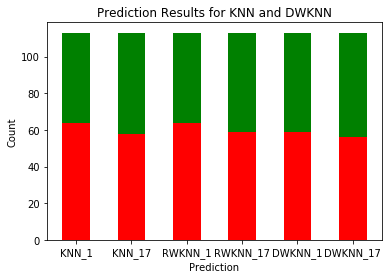

<Figure size 2160x2160 with 0 Axes>

In [31]:

KNN_kcomp1 = pd.read_csv('E7_KNN_T1_k1.csv')
#count number of CORRECT/ WRONG.
KNN_kcomp1_results = KNN_kcomp1.groupby('prediction').count().data
count_correct_KNN_kcomp1 = (KNN_kcomp1_results.CORRECT)
count_wrong_KNN_kcomp1 = (KNN_kcomp1_results.WRONG)

KNN_kcomp2 = pd.read_csv('E7_KNN_T1_k17.csv')
#count number of CORRECT/ WRONG.
KNN_kcomp2_results = KNN_kcomp2.groupby('prediction').count().data
count_correct_KNN_kcomp2 = (KNN_kcomp2_results.CORRECT)
count_wrong_KNN_kcomp2 = (KNN_kcomp2_results.WRONG)


RWKNN_kcomp1 = pd.read_csv('E7_RWKNN_T1_k1.csv')
#count number of CORRECT/ WRONG.
RWKNN_kcomp1_results = RWKNN_kcomp1.groupby('prediction').count().data
count_correct_RWKNN_kcomp1 = (RWKNN_kcomp1_results.CORRECT)
count_wrong_RWKNN_kcomp1 = (RWKNN_kcomp1_results.WRONG)

RWKNN_kcomp2 = pd.read_csv('E7_RWKNN_T1_k17.csv')
#count number of CORRECT/ WRONG.
RWKNN_kcomp2_results = RWKNN_kcomp2.groupby('prediction').count().data
count_correct_RWKNN_kcomp2 = (RWKNN_kcomp2_results.CORRECT)
count_wrong_RWKNN_kcomp2 = (RWKNN_kcomp2_results.WRONG)


DWKNN_kcomp1 = pd.read_csv('E7_DWKNN_T1_k1.csv')
#count number of CORRECT/ WRONG.
DWKNN_kcomp1_results = DWKNN_kcomp1.groupby('prediction').count().data
count_correct_DWKNN_kcomp1 = (DWKNN_kcomp1_results.CORRECT)
count_wrong_DWKNN_kcomp1 = (DWKNN_kcomp1_results.WRONG)

DWKNN_kcomp2 = pd.read_csv('E7_DWKNN_T1_k17.csv')
#count number of CORRECT/ WRONG.
DWKNN_kcomp2_results = DWKNN_kcomp2.groupby('prediction').count().data
count_correct_DWKNN_kcomp2 = (DWKNN_kcomp2_results.CORRECT)
count_wrong_DWKNN_kcomp2 = (DWKNN_kcomp2_results.WRONG)


# create plot
n_groups = 1 # number of groups
fig, ax = plt.subplots()
index = np.arange(n_groups) # x location for groups
bar_width = 1

#first bar - rects1+rects2
rects1 = plt.bar(index, count_correct_KNN_kcomp1, bar_width, bottom = count_wrong_KNN_kcomp1, 
#                  label='KNN_1_CORRECT', 
                 color = 'g')
rects2 = plt.bar(index, count_wrong_KNN_kcomp1, bar_width, 
                 color = 'r')

rects3 = plt.bar(index + 2*bar_width, count_correct_KNN_kcomp2, bar_width, bottom = count_wrong_KNN_kcomp2, 
                 color = 'g')
rects4 = plt.bar(index + 2*bar_width, count_wrong_KNN_kcomp2, bar_width, 
                 color = 'r')

rects5 = plt.bar(index + 4*bar_width, count_correct_RWKNN_kcomp1, bar_width, bottom = count_wrong_RWKNN_kcomp1, 
                 color = 'g')
rects6 = plt.bar(index + 4*bar_width, count_wrong_RWKNN_kcomp1, bar_width,
                 color = 'r')

rects7 = plt.bar(index + 6*bar_width, count_correct_RWKNN_kcomp2, bar_width, bottom = count_wrong_RWKNN_kcomp2,
                 color = 'g')
rects8 = plt.bar(index + 6*bar_width, count_wrong_RWKNN_kcomp2, bar_width,
                 color = 'r')

rects9 = plt.bar(index + 8*bar_width, count_correct_DWKNN_kcomp1, bar_width, bottom = count_wrong_DWKNN_kcomp1,  
                 color = 'g')
rects10 = plt.bar(index + 8*bar_width, count_wrong_DWKNN_kcomp1, bar_width, 
                 color = 'r')

rects9 = plt.bar(index + 10*bar_width, count_correct_DWKNN_kcomp2, bar_width, bottom = count_wrong_DWKNN_kcomp2,  
                 color = 'g')
rects10 = plt.bar(index + 10*bar_width, count_wrong_DWKNN_kcomp2, bar_width, 
                 color = 'r')

plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Prediction Results for KNN and DWKNN')
plt.xticks([0,2*bar_width, 4*bar_width, 6*bar_width, 8*bar_width, 10*bar_width], ["KNN_1", "KNN_17", "RWKNN_1", "RWKNN_17", "DWKNN_1", "DWKNN_17"])
# plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.figure(figsize=(30,30))
plt.show()

In [ ]:
KNNsummary1 = KNN_kcomp1.groupby('prediction').count().data
RWKNNsummary1 = RWKNN_kcomp1.groupby('prediction').count().data
DWKNNsummary1 = DWKNN_kcomp1.groupby('prediction').count().data

KNNsummary2 = KNN_kcomp2.groupby('prediction').count().data
RWKNNsummary2 = RWKNN_kcomp2.groupby('prediction').count().data
DWKNNsummary2 = DWKNN_kcomp2.groupby('prediction').count().data

print("--------------")
print("Summary")
print("--------------")
print("KNNcomp1: \n", KNNsummary1)
print("Accuracy: ", KNN_kcomp1_results.CORRECT / 
      (KNN_kcomp1_results.CORRECT + KNN_kcomp1_results.WRONG))
print("\nKNNcomp2: \n", KNNsummary2)
print("Accuracy: ", KNN_kcomp2_results.CORRECT / 
      (KNN_kcomp2_results.CORRECT + KNN_kcomp2_results.WRONG))
print("--------------")
print("RWKNNcomp1: \n", RWKNNsummary1)
print("Accuracy: ", RWKNN_kcomp1_results.CORRECT / 
      (RWKNN_kcomp1_results.CORRECT + RWKNN_kcomp1_results.WRONG))
print("\nRWKNNcomp2: \n", RWKNNsummary2)
print("Accuracy: ", RWKNN_kcomp2_results.CORRECT / 
      (RWKNN_kcomp2_results.CORRECT + RWKNN_kcomp2_results.WRONG))
print("--------------")
print("DWKNNcomp1: \n", DWKNNsummary1)
print("Accuracy: ", DWKNN_kcomp1_results.CORRECT / 
      (DWKNN_kcomp1_results.CORRECT + DWKNN_kcomp1_results.WRONG))
print("\nDWKNNcomp2: \n", DWKNNsummary2)
print("Accuracy: ", DWKNN_kcomp2_results.CORRECT / 
      (DWKNN_kcomp2_results.CORRECT + DWKNN_kcomp2_results.WRONG))